Here we define the functions 
\begin{align}
    \label{vibartingPfunction}&P\left[\sin \left(\Omega_p t\right);\frac{\pi\kappa}{L} t\right]\\
    &\nonumber \\
    &=\left\{\begin{array}{cc}
    \frac{1}{16}\left[1+\frac{2\kappa^2\pi^2}{L^2}t^2-\cos\left(\frac{2\kappa\pi t}{L}\right)-\frac{2\kappa\pi t}{L}\sin\left(\frac{2\kappa\pi t}{L}\right)\right]     &\text{for}\quad p= \kappa  \\
    \frac{1}{2}\frac{p^3}{(p^2-\kappa^2)}\Bigg[\frac{1}{2p}\cos \left(\frac{2p\pi t}{L} \right)-\frac{1}{p-\kappa}\cos(p-\kappa )\frac{\pi t}{L}-\frac{1}{p+\kappa}\cos(p+\kappa)\frac{\pi t}{L}+\frac{2p}{p^2-\kappa^2}-\frac{1}{2p} \Bigg]     &\text{for}\quad p\neq \kappa 
    \end{array}\right.
\end{align}



In [1]:
import matplotlib.pyplot as plt
import numpy as np
pi = np.pi
e=10**-5
t0=0
tf=1
dt=250

#Here we break the equation into 10 parts
def f1(P,K):
    return ((P**3))/(2*(P**2-K**2))

def f2(P,K):
    return 1/(2*P)

def f3(P,K,t):
    return np.cos(2*K*t/e)

def f4(P,K):
    return 1/(P-K)

def f5(P,K,t):
    return np.cos((P-K)*t/e)

def f6(P,K):
    return 1/(P+K)

def f7(P,K,t):
    return np.cos((P+K)*t/e)

def f8(P,K):
    return (2*P)/(P**2-K**2)

def f9(K,t):
    return 2*(K*t/e)**2

def f10(K,t):
    return (2*K*t/e)*np.sin(2*K*t/e)

def f11(P,K,t):
    return np.cos(2*K*t/e)

#Here we paste all the parts into an unique expression
def V(p,k,t):
    if p==k:
        g=(1/16)*(1+f9(k,t)-f11(p,k,t)-f10(k,t))
    else:
        g= f1(p,k)*(f2(p,k)*f3(p,k,t)-f4(p,k)*f5(p,k,t)-f6(p,k)*f7(p,k,t)+f8(p,k)-f2(p,k))
    return g


Here we define the $\eta$ functions
$$
\eta_k(t)=\frac{\epsilon^2}{2}P\left(t;2k,p\right)
$$
$$
\eta_{kj}(t)=\frac{2kj\epsilon^2}{\left(j+ k\right)^2}  P\left(t;k+j,p\right)
$$

In [2]:
#Here we define the eta function needed

def nk(p,k,t):
    return ((e**2)/2)*V(p,2*k,t)

def nkj(p,k,j,t):
    return ((2*k*j*e**2)/((k+j)**2))*V(p,k+j,t)

And the number of particles created inside the cavity
$$
\langle N(t)\rangle =\sum_{k} \left(\eta_{k}(t)+\sum_{j(\neq k)} \eta_{kj}(t)\right)
$$

In [3]:
M=100

def N1(p,t):
    f = 0
    for k in range(1,M):
        if abs(V(p,2*k,t))>10**-15:
            f=f+nk(p,k,t)
    return f

def N2(p,t):
    f = 0
    for k in range(1,M):
        for j in range(1,M):
            if j!=k:
                if abs(V(p,k+j,t))>10**-15:
                    f=f+nkj(p,k,j,t)
    return f


def N(p,t):
    return N1(p,t)+N2(p,t)

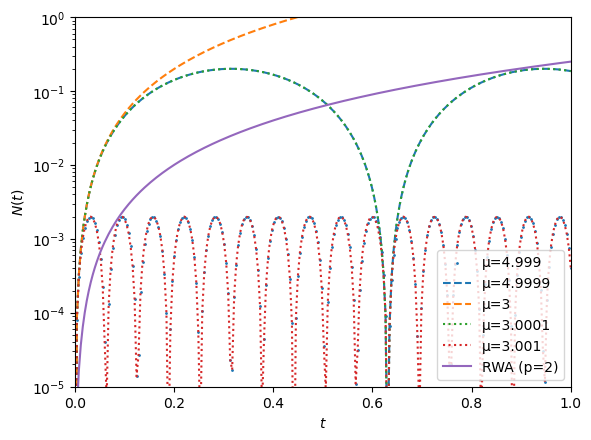

In [5]:
t0=0
tf=1
dt=250
T=np.linspace(t0,tf,dt)#Vector with divisions in time

#Putting the particle creation number <N> in a vector for each instant of time
#For p=1.999
Nu1=[]
for n in range(dt):
    f=N(4.999,t0+((tf-t0)/dt)*n)
    Nu1.append(f)
plt.scatter(T,Nu1,1)

#For p=1.9995
#Nu2=[]
#for t in range(dt):
#    f=N(1.9995,t)
#    Nu2.append(f)
#plt.scatter(T,Nu2,1)

#For p=1.9999
Nu3=[]
for n in range(dt):
    f=N(4.9999,t0+((tf-t0)/dt)*n)
    Nu3.append(f)
plt.plot(T,Nu3,ls="dashed")


#For p=2
Nu4=[]
for n in range(dt):
    f=N(5,t0+((tf-t0)/dt)*n)
    Nu4.append(f)
plt.plot(T,Nu4,ls="dashed")

#For p=2.0001
Nu5=[]
for n in range(dt):
    f=N(5.0001,t0+((tf-t0)/dt)*n)
    Nu5.append(f)
plt.plot(T,Nu5,ls="dotted")


#For p=2.0005
#Nu6=[]
#for t in range(dt):
#    f=N(2.0005,t)
#    Nu6.append(f)
#plt.scatter(T,Nu6,1)

#For p=2.001
Nu7=[]
for n in range(dt):
    f=N(5.001,t0+((tf-t0)/dt)*n)
    Nu7.append(f)
plt.plot(T,Nu7,ls="dotted")


Y=5*(25-1)(T**2)/24 #Analytical formula for ressonance in p=2
plt.plot(T,Y) #Plotting the analytic formula
plt.yscale('log')
plt.xlim(t0,tf) #Limits on the x-axis
plt.ylim(10**-5,1) #Limits on the y-axis    
#plt.title("<N(t)> vs τ (p=2)") #Title of the plot
plt.xlabel("$t$") #Label for the x-axis
plt.ylabel("$N(t)$") #Label for the y-axis
plt.legend(("µ=4.999","µ=4.9999","µ=3","µ=3.0001","µ=3.001","RWA (p=2)")) #Legend
plt.show() #Showing the plot


<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\gusta\AppData\Local\Temp\ipykernel_884\1788142452.py:6: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  Y=5*(25-1)(T**2)/24 #Analytical formula for ressonance in p=2


TypeError: 'int' object is not callable

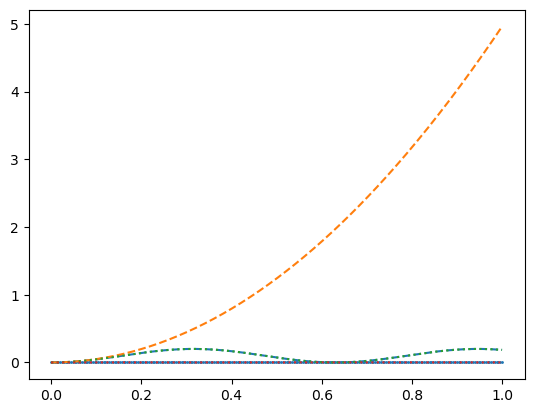

In [7]:
plt.scatter(T,Nu1,1)
plt.plot(T,Nu3,ls="dashed")
plt.plot(T,Nu4,ls="dashed")
plt.plot(T,Nu5,ls="dotted")
plt.plot(T,Nu7,ls="dotted")
Y=5*(25-1)(T**2)/24 #Analytical formula for ressonance in p=2
plt.plot(T,Y) #Plotting the analytic formula
plt.yscale('log')
plt.xlim(t0,tf) #Limits on the x-axis
plt.ylim(10**-5,1) #Limits on the y-axis    
#plt.title("<N(t)> vs τ (p=2)") #Title of the plot
plt.xlabel("$t$") #Label for the x-axis
plt.ylabel("$N(t)$") #Label for the y-axis
plt.legend(("µ=4.999","µ=4.9999","µ=3","µ=5.0001","µ=5.001","RWA (p=2)")) #Legend
plt.show() #Showing the plot

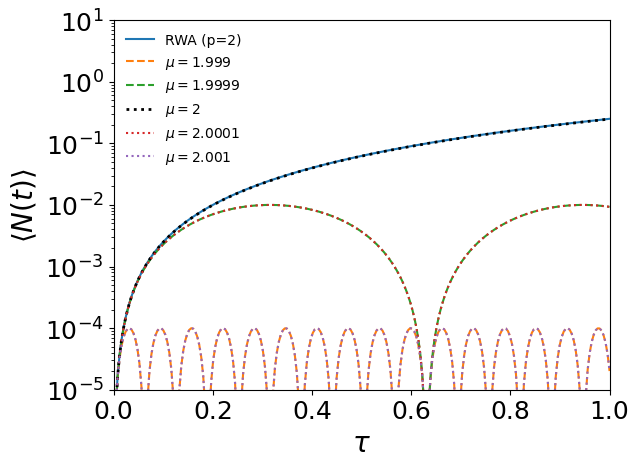

In [44]:
Y=(T**2)/4 #Analytical formula for ressonance in p=2

plt.plot(T,Y) #Plotting the analytic formula
plt.plot(T,Nu1,ls="dashed")
plt.plot(T,Nu3,ls="dashed")
plt.plot(T,Nu4,ls="dotted",color='black',lw=2)
plt.plot(T,Nu5,ls="dotted")
plt.plot(T,Nu7,ls="dotted")


plt.yscale('log')
# Building the axis, labels and legend of the figure
plt.legend(("RWA (p=2)","$\mu=1.999$","$\mu=1.9999$","$\mu=2$","$\mu=2.0001$","$\mu=2.001$"),frameon=False) #Legend
plt.xlim(t0,tf) #Limits on the x-axis
plt.ylim(10**-5,10) #Limits on the y-axis 
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("$ \\tau $",fontsize=20)
plt.ylabel("$\langle N(t) \\rangle $",fontsize=20)   
plt.savefig("N.png",dpi=300,bbox_inches='tight',transparent='true')


In [22]:
def P0(p,t):
    if abs(1-0.5*N1(p,t))<10**-15:
        f=0
    else:
        f=-(1-0.5*N1(p,t))*np.log((1-0.5*N1(p,t)))
    return f

def pk(p,k,t):
    if abs(0.5*nk(p,k,t))<10**-15:
        f=0
    else:
        f=-(0.5*nk(p,k,t))*np.log(0.5*nk(p,k,t))
    return f

def pkj(p,k,j,t):
    if abs(0.5*nkj(p,k,j,t))<10**-15:
        f=0
    else:
        f=-(0.5*nkj(p,k,j,t))*np.log(0.5*nkj(p,k,j,t))
    return f



In [23]:
def Pk(p,t):
    f = 0
    for k in range(1,100):
        if abs(V(p,2*k,t))>10**-20:
            f=f+pk(p,k,t)
    return f

def Pkj(p,t):
    f = 0
    for k in range(1,100):
        for j in range(1,100):
            if j!=k:
                if abs(V(p,k+j,t))>10**-20:
                    f=f+pkj(p,k,j,t)
    return f


def S(p,t):
    return P0(p,t)+Pk(p,t)+Pkj(p,t)

C:\Users\gusta\AppData\Local\Temp\ipykernel_11016\2648315885.py:12: RuntimeWarning: invalid value encountered in log
  f=-(0.5*nk(p,k,t))*np.log(0.5*nk(p,k,t))
C:\Users\gusta\AppData\Local\Temp\ipykernel_11016\1722229659.py:39: RuntimeWarning: divide by zero encountered in log
  Y=((T**2)/(8))*(1-np.log((T**2)/(8)))
C:\Users\gusta\AppData\Local\Temp\ipykernel_11016\1722229659.py:39: RuntimeWarning: invalid value encountered in multiply
  Y=((T**2)/(8))*(1-np.log((T**2)/(8)))


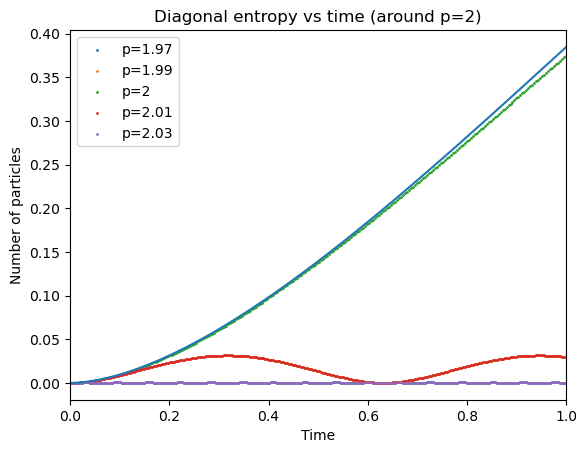

In [30]:
t0=0
tf=1
dt=250
T=np.linspace(t0,tf,dt)#Vector with divisions in time

#Putting diagonal entropy in a vector for all instants of time

Su1=[]
for n in range(dt):
    f=S(1.999,t0+((tf-t0)/dt)*n)
    Su1.append(f)
plt.scatter(T,Su1,1)


Su2=[]
for n in range(dt):
    f=S(1.9999,t0+((tf-t0)/dt)*n)
    Su2.append(f)
plt.scatter(T,Su2,1)

Su3=[]
for n in range(dt):
    f=S(2,t0+((tf-t0)/dt)*n)
    Su3.append(f)
plt.scatter(T,Su3,1)

Su4=[]
for n in range(dt):
    f=S(2.0001,t0+((tf-t0)/dt)*n)
    Su4.append(f)
plt.scatter(T,Su4,1)

Su5=[]
for n in range(dt):
    f=S(2.001,t0+((tf-t0)/dt)*n)
    Su5.append(f)
plt.scatter(T,Su5,1)

Y=((T**2)/(8))*(1-np.log((T**2)/(8)))
plt.plot(T,Y)
plt.xlim(t0,tf)
#plt.ylim(0,10**-6) #Limits on the y-axis    
plt.title("Diagonal entropy vs time (around p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=1.97","p=1.99","p=2","p=2.01","p=2.03")) #Legend
plt.show() #Showing the plot


C:\Users\gusta\AppData\Local\Temp\ipykernel_11016\1438117346.py:1: RuntimeWarning: divide by zero encountered in log
  Y=((T**2)/(8))*(1-np.log((T**2)/(8))) #Analytical formula for ressonance in p=2
C:\Users\gusta\AppData\Local\Temp\ipykernel_11016\1438117346.py:1: RuntimeWarning: invalid value encountered in multiply
  Y=((T**2)/(8))*(1-np.log((T**2)/(8))) #Analytical formula for ressonance in p=2


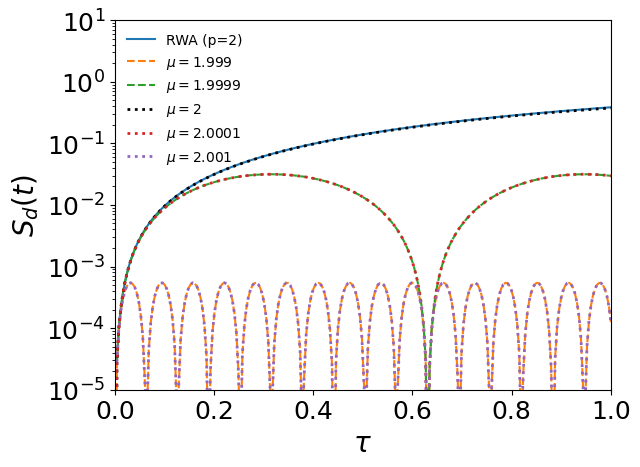

In [47]:
Y=((T**2)/(8))*(1-np.log((T**2)/(8))) #Analytical formula for ressonance in p=2

plt.plot(T,Y) #Plotting the analytic formula
plt.plot(T,Su1,ls="dashed")
plt.plot(T,Su2,ls="dashed")
plt.plot(T,Su3,ls="dotted",color='black',lw=2)
plt.plot(T,Su4,ls="dotted",lw=2)
plt.plot(T,Su5,ls="dotted",lw=2)

plt.yscale('log')
# Building the axis, labels and legend of the figure
plt.legend(("RWA (p=2)","$\mu=1.999$","$\mu=1.9999$","$\mu=2$","$\mu=2.0001$","$\mu=2.001$"),frameon=False,loc=2) #Legend
plt.xlim(t0,tf) #Limits on the x-axis
plt.ylim(10**-5,10) #Limits on the y-axis 
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("$ \\tau $",fontsize=20)
plt.ylabel("$S_d(t) $",fontsize=20)   
plt.savefig("S.png",dpi=300,bbox_inches='tight',transparent='true')



/tmp/ipykernel_59987/446572634.py:1: RuntimeWarning: divide by zero encountered in log
  Z=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))
/tmp/ipykernel_59987/446572634.py:1: RuntimeWarning: invalid value encountered in multiply
  Z=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))


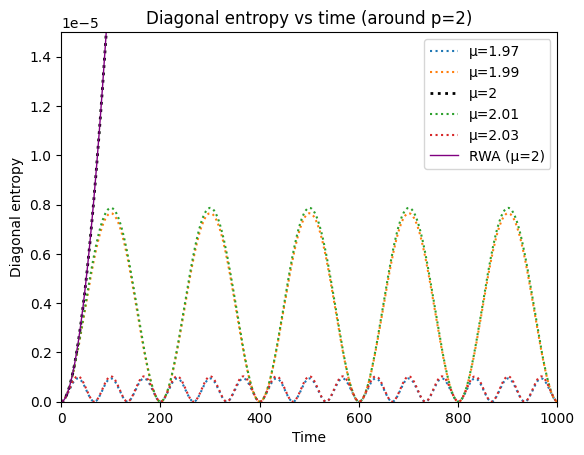

In [74]:

Z=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))

plt.plot(T,Su195, ls='dotted')
plt.plot(T,Su19, ls='dotted')
plt.plot(T,Su2, ls='dotted',color='black',lw=2)
plt.plot(T,Su201, ls='dotted')
plt.plot(T,Su205, ls='dotted')
plt.plot(T,Z,color="purple",lw=1)

#plt.plot(T,V)
plt.xlim(t0,tf)
plt.ylim(0,0.15*10**-4) #Limits on the y-axis    
plt.title("Diagonal entropy vs time (around p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Diagonal entropy") #Label for the y-axis
plt.legend(("µ=1.97","µ=1.99","µ=2","µ=2.01","µ=2.03","RWA (µ=2)")) #Legend
plt.show() #Showing the plot

In [ ]:
Y=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))

plt.plot(T,Su195, ls='dotted')
plt.plot(T,Su19, ls='dotted')
plt.plot(T,Su2, ls='dotted',color='black',lw=2)
plt.plot(T,Su201, ls='dotted')
plt.plot(T,Su205, ls='dotted')
plt.plot(T,Y,color="purple",lw=1)
#plt.plot(T,V)
plt.xlim(t0,tf)
plt.ylim(0,0.5*10**-4) #Limits on the y-axis    
plt.title("Diagonal entropy vs time (around p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Diagonal entropy") #Label for the y-axis
plt.legend(("µ=1.97","µ=1.99","µ=2","µ=2.01","µ=2.03","RWA (µ=2)")) #Legend
plt.show() #Showing the plot

In [19]:
t0=0
tf=200
dt=200
T=np.linspace(t0,tf,dt)#Vector with divisions in time

#Putting diagonal entropy in a vector for all instants of time

Su195=[]
for t in range(dt):
    f=S(1.95,t)
    Su195.append(f)
plt.plot(T,Su195)


Su19=[]
for t in range(dt):
    f=S(1.99,t)
    Su19.append(f)
plt.plot(T,Su19)

Su2=[]
for t in range(dt):
    f=S(2,t)
    Su2.append(f)
plt.plot(T,Su2)

Su201=[]
for t in range(dt):
    f=S(2.01,t)
    Su201.append(f)
plt.plot(T,Su201)

Su205=[]
for t in range(dt):
    f=S(2.05,t)
    Su205.append(f)
plt.plot(T,Su205)

Y=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))
W=(((e**2)*(pi**2)*T**2)/(8))
plt.plot(T,Y)
plt.plot(T,W)
plt.xlim(t0,tf)
#plt.ylim(0,10**-6) #Limits on the y-axis    
plt.title("Diagonal entropy vs time (around p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=1.97","p=1.99","p=2","p=2.01","p=2.03","RWA (p=2)")) #Legend
plt.show() #Showing the plot


NameError: name 'S' is not defined

/tmp/ipykernel_10270/3668625058.py:1: RuntimeWarning: divide by zero encountered in log
  Y=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))
/tmp/ipykernel_10270/3668625058.py:1: RuntimeWarning: invalid value encountered in multiply
  Y=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))
/tmp/ipykernel_10270/3668625058.py:4: RuntimeWarning: divide by zero encountered in log
  Z=-(((e**2)*(pi**2)*T**2)/(8))*(np.log(((e**2)*(pi**2)*T**2)/(8)))
/tmp/ipykernel_10270/3668625058.py:4: RuntimeWarning: invalid value encountered in multiply
  Z=-(((e**2)*(pi**2)*T**2)/(8))*(np.log(((e**2)*(pi**2)*T**2)/(8)))


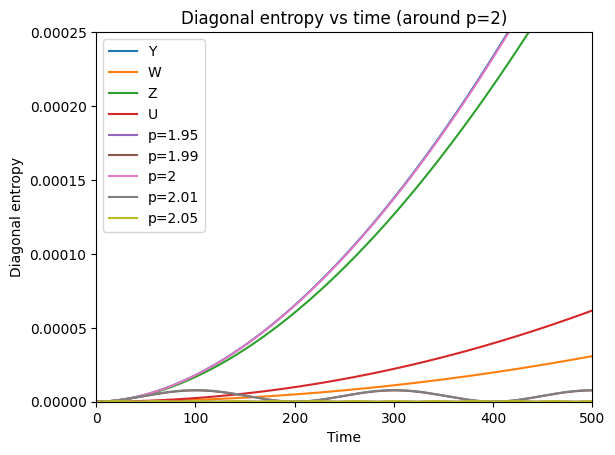

In [169]:
Y=(((e**2)*(pi**2)*T**2)/(8))*(1-np.log(((e**2)*(pi**2)*T**2)/(8)))
W=(((e**2)*(pi**2)*T**2)/(8))
U=(((e**2)*(pi**2)*T**2)/(4))
Z=-(((e**2)*(pi**2)*T**2)/(8))*(np.log(((e**2)*(pi**2)*T**2)/(8)))
plt.plot(T,Y)
plt.plot(T,W)
plt.plot(T,Z)
plt.plot(T,U)
plt.plot(T,Su195)
plt.plot(T,Su19)
plt.plot(T,Su2)
plt.plot(T,Su201)
plt.plot(T,Su205)
plt.xlim(0,tf)
plt.ylim(0,2.5*10**-4) #Limits on the y-axis    
plt.title("Diagonal entropy vs time (around p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Diagonal entropy") #Label for the y-axis
plt.legend(("Y","W","Z","U","p=1.95","p=1.99","p=2","p=2.01","p=2.05")) #Legend
plt.show() #Showing the plot

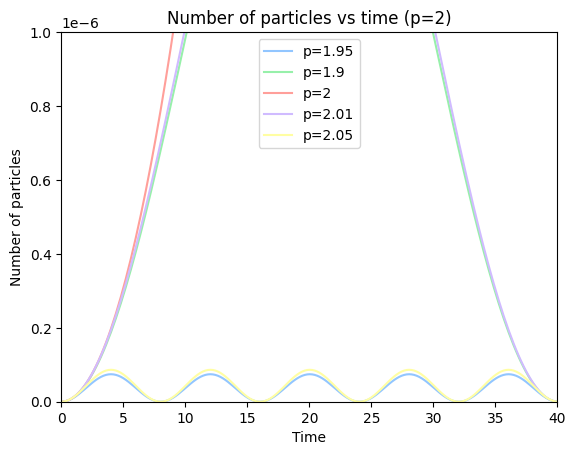

In [144]:
t0=0
tf=100
dt=500
T=np.linspace(t0,tf,dt)#Vector with divisions in time

#Putting Number of particles in a vector for all instants of time

Nu195=[]
for t in range(dt):
    f=N(1.95,t)
    Nu195.append(f)
plt.plot(T,Nu195)


Nu19=[]
for t in range(dt):
    f=N(1.99,t)
    Nu19.append(f)
plt.plot(T,Nu19)

Nu2=[]
for t in range(dt):
    f=N(2,t)
    Nu2.append(f)
plt.plot(T,Nu2)

Nu201=[]
for t in range(dt):
    f=N(2.01,t)
    Nu201.append(f)
plt.plot(T,Nu201)

Nu205=[]
for t in range(dt):
    f=N(2.05,t)
    Nu205.append(f)
plt.plot(T,Nu205)

plt.xlim(0,40)
plt.ylim(0,10**-6) #Limits on the y-axis    
plt.title("Number of particles vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=1.95","p=1.9","p=2","p=2.01","p=2.05")) #Legend
plt.show() #Showing the plot


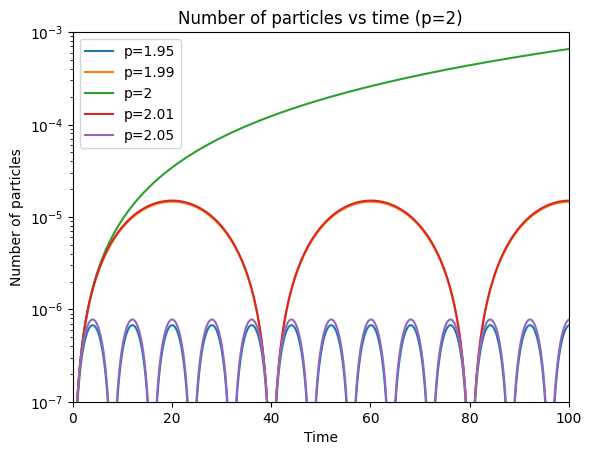

In [60]:
plt.plot(T,Nu195)
plt.plot(T,Nu19)
plt.plot(T,Nu2)
plt.plot(T,Nu201)
plt.plot(T,Nu205)
plt.yscale('log')
plt.xlim(0,100)
plt.ylim(10**-7,10**-3) #Limits on the y-axis    
plt.title("Number of particles vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=1.95","p=1.99","p=2","p=2.01","p=2.05")) #Legend
plt.show() #Showing the plot

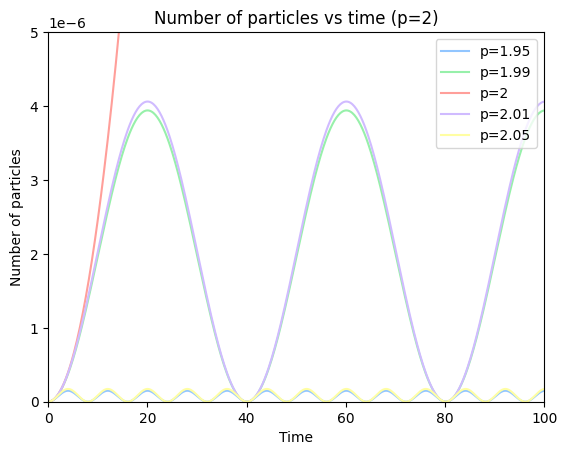

In [141]:
plt.plot(T,Nu195)
plt.plot(T,Nu19)
plt.plot(T,Nu2)
plt.plot(T,Nu201)
plt.plot(T,Nu205)
plt.xlim(0,100)
plt.ylim(0,5*10**-6) #Limits on the y-axis    
plt.title("Number of particles vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=1.95","p=1.99","p=2","p=2.01","p=2.05")) #Legend
plt.show() #Showing the plot


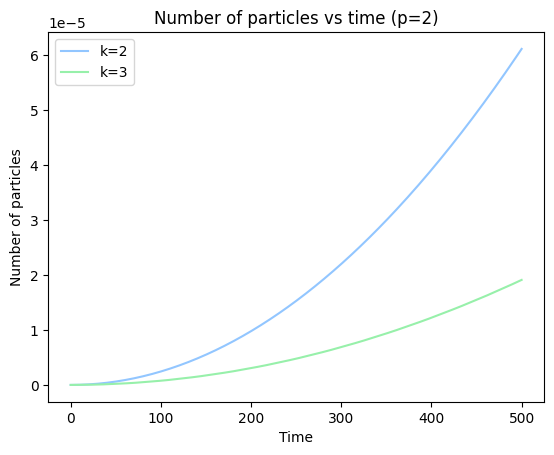

In [120]:
Nu3 = []
for t in range(dt):
    f = N(3,t)
    Nu3.append(f)
Nu2 = []
for t in range(dt):
    f = N(2,t)
    Nu2.append(f)


plt.plot(T, Nu2)
plt.plot(T,Nu3)

#plt.yscale('log') #Logarithimic scale for the y axis
#plt.xlim(0,tf)
#plt.ylim(10**-6,10**-0) #Limits on the y-axis
plt.title("Number of particles vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis 
plt.legend(("k=2","k=3")) #Legend
plt.show() #Showing the plot


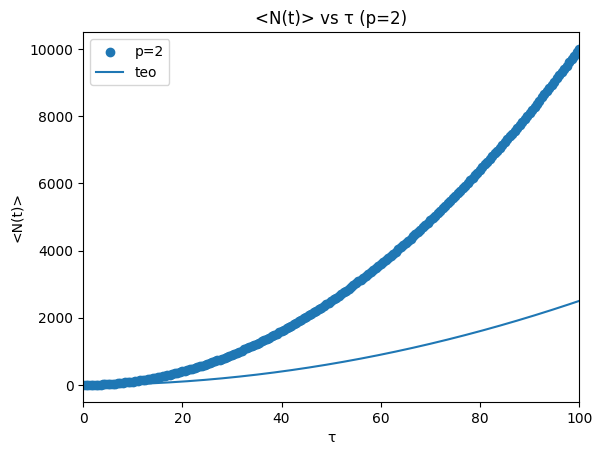

In [17]:
t0=0
tf=100
dt=201
T=np.linspace(t0,tf,dt)#Vector with divisions in time

#Putting diagonal entropy in a vector for all instants of time

Nu4=[]
for t in range(dt):
    f=N(2,t)
    Nu4.append(f)
    
#Here I define
Y=(T**2)/4
plt.scatter(T,Nu4)
plt.plot(T,Y)

plt.xlim(t0,tf)
#plt.ylim(0,10**-6) #Limits on the y-axis    
plt.title("<N(t)> vs τ (p=2)") #Title of the plot
plt.xlabel("τ") #Label for the x-axis
plt.ylabel("<N(t)>") #Label for the y-axis
plt.legend(("p=2","teo")) #Legend
plt.show() #Showing the plot


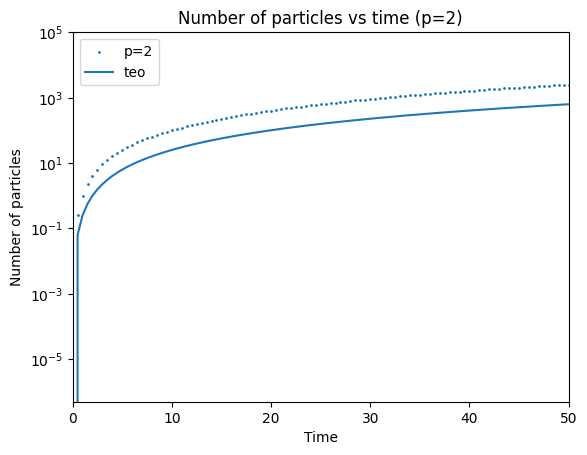

In [18]:
Y=(T**2)/4
plt.scatter(T,Nu4,1)
plt.plot(T,Y)
plt.yscale('log')
plt.xlim(t0,tf/2)
plt.ylim(5*10**-7,10**5) #Limits on the y-axis     
plt.title("Number of particles vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Number of particles") #Label for the y-axis
plt.legend(("p=2","teo")) #Legend
plt.show() #Showing the plot

/tmp/ipykernel_6135/1560978546.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


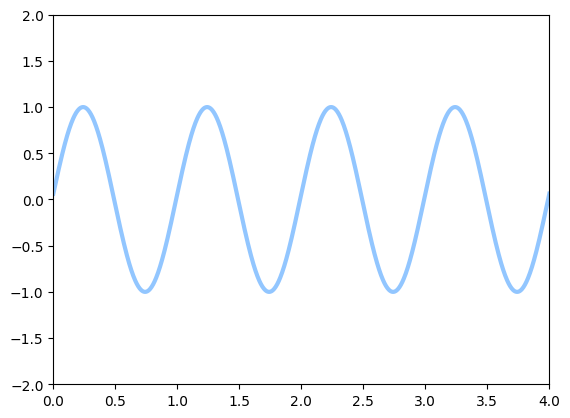

In [101]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [5]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt

d= 12 #dimensionality in which we truncate each Fock space mode
e = 10**-5 #small amplitude parameter
a= e*np.pi/4#Multiplicative constant for the hamiltonian
t0=0 #Initial instant of time for the time evolution
tf=50000#Final  //    //  //    //     //
dt=200 #Number of time divisions in the time evolution


#Defining the coeficient f(k) present in the hamiltonian
def f(l):
    f = ((l+2)*l)/(2*l+2)*(np.sqrt((l+2)/l)+np.sqrt(l/(l+2)))
    return f

A = destroy(d) #Anihilation operator
Ad = create(d) #Creation Operator
N = num(d)     #Number Operator
I = qeye(d)    #Identity Operator

#Creation and anihilation operator for the k-th mode
a1  = tensor(A,I,I)
a3  = tensor(I,A,I)
a5  = tensor(I,I,A)
ad1 = a1.dag()
ad3 = a3.dag()
ad5 = a5.dag()

times=np.linspace(t0,tf,dt)#Vector with divisions in time

vac = tensor(basis(d,0),basis(d,0),basis(d,0))  #Vacuum state
H = a*(ad1**2+a1**2+f(1)*(ad3*a1+ad1*a3)+f(3)*(ad5*a3+ad3*a5)) #Hamiltonian
#rho0 = vac*vac.dag() #Vacuum density matrix

#Numerical time evolution function in qutip
result = sesolve(H, vac, times)

#Density matrix at each instant of time
def rho_t(t):
    f = result.states[t]*(result.states[t]).dag()
    return f

In [6]:
#Defining the eigenkets of the hamiltonian (Number of particles N)
def eigenket(n):
    f = N.eigenstates()[1][n]
    return f

#Mode k=1

#Defining the diagonal elements of rho(t) for mode k=3
def rho1_nn(t,n):
    g= eigenket(n).dag()*rho_t(t).ptrace(0)*eigenket(n)
    if np.real(g)==0:
        g=1
    return g

#Defining little diagonal entropy s(t,n) such that S(t)=Σn s(t,n)
def s1(t,n):
    f = -(np.log(np.real(rho1_nn(t,n)))*np.real(rho1_nn(t,n)))
    return f

#Defining Diagonal entropy for each instant of time
def S1_d(t):
    f = 0
    for n in range(d):
        f = f + s1(t,n)
    return f

#Putting S_d(t) in a vector for all instants of time
S1 = []
for t in range(dt):
    f = S1_d(t)
    S1.append(f)


#Mode k=3

def rho3_nn(t,n):
    g= eigenket(n).dag()*rho_t(t).ptrace(1)*eigenket(n)
    if np.real(g)==0:
        g=1
    return g
def s3(t,n):
    f = -(np.log(np.real(rho3_nn(t,n)))*np.real(rho3_nn(t,n)))
    return f
def S3_d(t):
    f = 0
    for n in range(d):
        f = f + s3(t,n)
    return f
S3 = []
for t in range(dt):
    f = S3_d(t)
    S3.append(f)

#Mode k=5

def rho5_nn(t,n):
    g= eigenket(n).dag()*rho_t(t).ptrace(2)*eigenket(n)
    if np.real(g)==0:
        g=1
    return g
def s5(t,n):
    f = -(np.log(np.real(rho5_nn(t,n)))*np.real(rho5_nn(t,n)))
    return f
def S5_d(t):
    f = 0
    for n in range(d):
        f = f + s5(t,n)
    return f
S5 = []
for t in range(dt):
    f = S5_d(t)
    S5.append(f)

/tmp/ipykernel_19321/2741262247.py:4: RuntimeWarning: divide by zero encountered in log
  Steo1 = Steo12-6*a**4*times**4*np.log(6*a**4*times**4)
/tmp/ipykernel_19321/2741262247.py:4: RuntimeWarning: invalid value encountered in multiply
  Steo1 = Steo12-6*a**4*times**4*np.log(6*a**4*times**4)
/tmp/ipykernel_19321/2741262247.py:6: RuntimeWarning: divide by zero encountered in log
  Steo3= -3*a**4*times**4*np.log(3*a**4*times**4)
/tmp/ipykernel_19321/2741262247.py:6: RuntimeWarning: invalid value encountered in multiply
  Steo3= -3*a**4*times**4*np.log(3*a**4*times**4)
/tmp/ipykernel_19321/2741262247.py:7: RuntimeWarning: divide by zero encountered in log
  Steo5= -5*a**6*times**6*np.log(5*a**6*times**6)
/tmp/ipykernel_19321/2741262247.py:7: RuntimeWarning: invalid value encountered in multiply
  Steo5= -5*a**6*times**6*np.log(5*a**6*times**6)


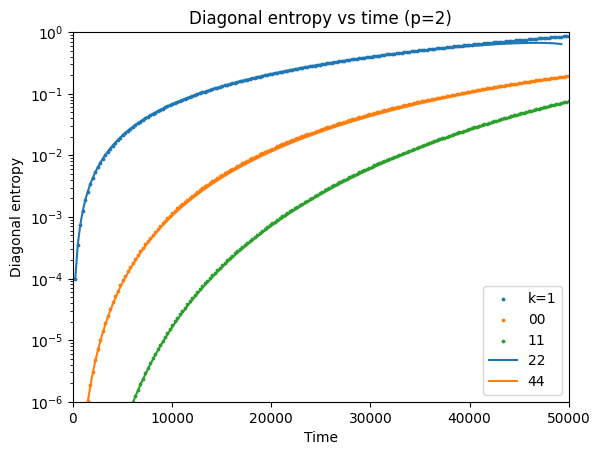

In [18]:
#Steo10 = -(1-2*a**2*times**2+(13/3)*a**4*times**4)*np.log(1-2*a**2*times**2+(13/3)*a**4*times**4)
#Steo11 = Steo10-(3*a**4*times**4)*np.log(3*a**4*times**4)
#Steo12 = Steo11-(2*a**2*times**2*(1-(20/3)*a**2*times**2))*np.log(2*a**2*times**2*(1-(20/3)*a**2*times**2))
Steo1 = Steo12-6*a**4*times**4*np.log(6*a**4*times**4)
#Steo1 = -(2*a**2*times**2)*(np.log(2*a**2*times**2)-1)
Steo3= -3*a**4*times**4*np.log(3*a**4*times**4)
Steo5= -5*a**6*times**6*np.log(5*a**6*times**6)


#Plot numerical scattered points
plt.scatter(times,S1,s=3)
plt.scatter(times,S3,s=3)
plt.scatter(times,S5,s=3)

#Plotting analytical graphs
plt.plot(times, Steo1)
plt.plot(times, Steo3)
plt.plot(times, Steo5)


plt.yscale('log') #Logarithimic scale for the y axis
plt.xlim(0,tf)
plt.ylim(10**-6,10**-0) #Limits on the y-axis
plt.title("Diagonal entropy vs time (p=2)") #Title of the plot
plt.xlabel("Time") #Label for the x-axis
plt.ylabel("Diagonal entropy") #Label for the y-axis 
plt.legend(("k=1","00","11", "22","44")) #Legend
plt.show() #Showing the plot

In [9]:
def Per3(t):
    return ((S3_d(t)+3*a**4*t**4*np.log(3*a**4*t**4))*100)/(S3_d(t))
 
plt.scatter(times,Per3(times),s=3)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index